<a href="https://colab.research.google.com/github/Tclack88/DS-Unit-2-Applied-Modeling/blob/master/module1/assignment_applied_modeling_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [x] Choose your target. Which column in your tabular dataset will you predict?
- [x] Choose which observations you will use to train, validate, and test your model. And which observations, if any, to exclude.
- [x] Determine whether your problem is regression or classification.
- [x] Choose your evaluation metric.
- [x] Begin to clean and explore your data.
- [x] Begin to choose which features, if any, to exclude. Would some features "leak" information from the future?


## Loading and Data corresponding Data Dictionary

In [0]:
import pandas as pd

# Source 
# -  monthly https://www.eia.gov/electricity/data/eia860m/
# - annual summary https://www.eia.gov/electricity/data/eia860/

url = "https://www.eia.gov/electricity/data/eia860m/xls/july_generator2019.xlsx"

In [3]:
data = pd.read_excel(url,header=1) # first row contains relevant table info

data = data.iloc[0:-1] #  last row is notes being read as a row
data.head()

,Entity ID,Entity Name,Plant ID,Plant Name,Sector,Plant State,Generator ID,Unit Code,Nameplate Capacity (MW),Net Summer Capacity (MW),Net Winter Capacity (MW),Technology,Energy Source Code,Prime Mover Code,Operating Month,Operating Year,Planned Retirement Month,Planned Retirement Year,Status,Planned Derate Year,Planned Derate Month,Planned Derate of Summer Capacity (MW),Planned Uprate Year,Planned Uprate Month,Planned Uprate of Summer Capacity (MW),County,Latitude,Longitude,Google Map,Bing Map,Balancing Authority Code
0,195,Alabama Power Co,2.0,Bankhead Dam,Electric Utility,AL,1,NaN,53.9,53,53,Conventional Hydroelectric,WAT,HY,7.0,1963.0,,,(OP) Operating,,,,,,,Tuscaloosa,33.458665,-87.35682,Map,Map,SOCO
1,195,Alabama Power Co,3.0,Barry,Electric Utility,AL,1,NaN,153.1,55.5,55.5,Natural Gas Steam Turbine,NG,ST,2.0,1954.0,,,(OP) Operating,,,,,,,Mobile,31.006900,-88.01030,Map,Map,SOCO
2,195,Alabama Power Co,3.0,Barry,Electric Utility,AL,2,NaN,153.1,55.5,55.5,Natural Gas Steam Turbine,NG,ST,7.0,1954.0,,,(OP) Operating,,,,,,,Mobile,31.006900,-88.01030,Map,Map,SOCO
3,195,Alabama Power Co,3.0,Barry,Electric Utility,AL,4,NaN,403.7,362,362,Conventional Steam Coal,BIT,ST,12.0,1969.0,,,(OP) Operating,,,,,,,Mobile,31.006900,-88.01030,Map,Map,SOCO
4,195,Alabama Power Co,3.0,Barry,Electric Utility,AL,5,NaN,788.8,756.5,756.5,Conventional Steam Coal,BIT,ST,10.0,1971.0,,,(OP) Operating,,,,,,,Mobile,31.006900,-88.01030,Map,Map,SOCO


### Data Dictionary:

In [0]:
url2 = "https://www.eia.gov/electricity/data/eia860m/archive/xls/energy_source_codes_prime_mover.xlsx"

energy_codes = pd.read_excel(url2,header=1)

prime_mover_codes = pd.read_excel(url2,header=1,sheet_name=1)
prime_mover_table = prime_mover_codes.iloc[:,[1,2]]

In [5]:
prime_mover_table

,Prime Mover Code,Prime Mover Description
0,BA,"Energy Storage, Battery"
1,CE,"Energy Storage, Compressed Air"
2,CP,"Energy Storage, Concentrated Solar Power"
3,FW,"Energy Storage, Flywheel"
4,PS,"Energy Storage, Reversible Hydraulic Turbine (..."
5,ES,"Energy Storage, Other (specify in SCHEDULE 7)"
6,ST,"Steam Turbine, including nuclear, geothermal a..."
7,GT,Combustion (Gas) Turbine (does not include the...
8,IC,"Internal Combustion Engine (diesel, piston, re..."
9,CA,Combined Cycle Steam Part


In [6]:
fossil_fuel_table = energy_codes.iloc[3:21]
fossil_fuel_table['Fuel Type'] = fossil_fuel_table['Fuel Type'].ffill()
fossil_fuel_table = fossil_fuel_table.iloc[:,[1,2,6]]
fossil_fuel_table

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Fuel Type,Energy,Energy Source Description
3,Coal,ANT,Anthracite Coal
4,Coal,BIT,Bituminous Coal
5,Coal,LIG,Lignite Coal
6,Coal,SGC,Coal-Derived Synthesis Gas
7,Coal,SUB,Subbituminous Coal
8,Coal,WC,"Waste/Other Coal (incl. anthracite culm, bitum..."
9,Coal,RC,Refined Coal
10,Petroleum Products,DFO,"Distillate Fuel Oil (including diesel, No. 1, ..."
11,Petroleum Products,JF,Jet Fuel
12,Petroleum Products,KER,Kerosene


In [7]:
renewable_fuel_table = energy_codes.iloc[22:]
renewable_fuel_table['Fuel Type'] = renewable_fuel_table['Fuel Type'].ffill()
renewable_fuel_table = renewable_fuel_table.iloc[:,[1,2,6]]
renewable_fuel_table

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Fuel Type,Energy,Energy Source Description
22,Solid Renewable Fuels,AB,Agricultural By-Products
23,Solid Renewable Fuels,MSW,Municipal Solid Waste
24,Solid Renewable Fuels,OBS,Other Biomass Solids (specify in SCHEDULE 7)
25,Solid Renewable Fuels,WDS,"Wood/Wood Waste Solids (incl. paper pellets, r..."
26,Liquid Renewable (Biomass) Fuels,OBL,Other Biomass Liquids (specify in SCHEDULE 7)
27,Liquid Renewable (Biomass) Fuels,SLW,Sludge Waste
28,Liquid Renewable (Biomass) Fuels,BLQ,Black Liquor
29,Liquid Renewable (Biomass) Fuels,WDL,Wood Waste Liquids excluding Black Liquor (inc...
30,Gaseous Renewable (Biomass) Fuels,LFG,Landfill Gas
31,Gaseous Renewable (Biomass) Fuels,OBG,"Other Biomass Gas (including digester gas, met..."


In [8]:
data.groupby('Technology')['Energy Source Code'].unique()

Technology
All Other                                              [WH, PUR, OTH, TDF]
Batteries                                                            [MWH]
Coal Integrated Gasification Combined Cycle                          [SGC]
Conventional Hydroelectric                                           [WAT]
Conventional Steam Coal                            [BIT, LIG, SUB, RC, WC]
Flywheels                                                            [MWH]
Geothermal                                                           [GEO]
Hydroelectric Pumped Storage                                         [WAT]
Landfill Gas                                                         [LFG]
Municipal Solid Waste                                                [MSW]
Natural Gas Fired Combined Cycle                                      [NG]
Natural Gas Fired Combustion Turbine                                  [NG]
Natural Gas Internal Combustion Engine                                [NG]
Natural Gas St

### Other Columns:

Unit Code: 


<hr>

## Choosing Target and Observations
Target should be one of:

- Nameplate Capacity (MW)
- <del>Net Summer Capacity (MW)</del>
- <del>Net Winter Capacity (MW)</del>

<del>It's hard to choose, Nameplate seems to be an assumed operating capacity while the summer and winter capacity's seem to reflect actual measured values.</del> 

It appears there are missing values for Net Summer and Winter Capacities, since they are close to nameplace capacity, I will just use that as my target


I'd like to predict the operating capacities given the technology used, and the location (latitude and longitude). There are 27 unique value counts for technology. There are 46 combinations of technoligy and Energy Source Codes. So 'Technology' is just a super grouping of some combinations of 'Energy Source Code' and 'Prime Mover Code', so it may be redundant to include 'Technology' in the observation, but it's also nice to have one "master label" for a bunch of smaller groups of technologies. 

"Operating year" should be used as well, because this is the year the plant went into operation. My assumption is that later plants give out higher power because there is a higher demand for energy from the larger population. <del> I unfortunately don't have a "number of units" for perhaps the number of steam turbines, PV cells, etc. in each power plant, so I'm hoping the operating year will imply that information.</del> Each entry actually appears to be an individual generator. There are about 22,000 columns and a cursory google search reveals the US has about 8,000 power plants in operation, and seeing that there are multiple columns with the same lat,lon, entity name, but slightly different generator ID's (eg : '3A' and '3B') this leads me to believe this is actually data for every individual generator, not just an entire plant

## Excluding Features

Once an actual Target is chosed, the other two should be removed (eg keep net summer capacity, remove the others because they will be strongly correlated)

## Problem Style - regressor or classifier

This COULD be a regression problem because the target is a numerical output, but <del>because of the lack of information regarding number of generators, the power capacity might vary considerably around a range, so</del> it might be best to make bins of power output and turn this into a classifier problem.

## Evaluation Metric
Because of the range of outputs and the nature of the data, choosing a baseline as the majority group doesn't make sense. As a result, an ROC-AUC dosn't fit because of this non-binary output. If I ultimately decide on the classifier, then a confusion matrix would be the best metric

<hr>

## Data Exploration

In [9]:
data.describe()

,Plant ID,Nameplate Capacity (MW),Operating Month,Operating Year,Latitude,Longitude
count,22315.000000,22315.000000,22315.000000,22315.000000,22315.000000,22315.000000
mean,34141.517455,53.697262,6.594085,1990.075823,39.265069,-94.488080
std,26543.689395,129.408144,3.608851,27.505100,6.145747,19.104133
min,2.000000,0.100000,1.000000,1891.000000,18.974200,-171.712400
25%,3612.000000,1.500000,4.000000,1974.000000,35.220828,-106.601000
50%,54134.000000,5.000000,6.000000,2001.000000,39.737500,-90.145800
75%,57746.500000,49.800000,10.000000,2012.000000,42.668981,-79.432500
max,62940.000000,1499.400000,12.000000,2019.000000,71.292000,-67.003300


In [10]:
# Summer and Winter capacities are non numeric, this will find the non-numeric entries

def returnstring(x):
  return type(x) == str
isstring = data['Net Summer Capacity (MW)'].apply(returnstring)

data[isstring]

,Entity ID,Entity Name,Plant ID,Plant Name,Sector,Plant State,Generator ID,Unit Code,Nameplate Capacity (MW),Net Summer Capacity (MW),Net Winter Capacity (MW),Technology,Energy Source Code,Prime Mover Code,Operating Month,Operating Year,Planned Retirement Month,Planned Retirement Year,Status,Planned Derate Year,Planned Derate Month,Planned Derate of Summer Capacity (MW),Planned Uprate Year,Planned Uprate Month,Planned Uprate of Summer Capacity (MW),County,Latitude,Longitude,Google Map,Bing Map,Balancing Authority Code
1116,7801,Gulf Power Co,643.0,Lansing Smith,Electric Utility,FL,3A,G180,203.2,,,Natural Gas Fired Combined Cycle,NG,CT,4.0,2002.0,,,(OP) Operating,,,,,,,Bay,30.268600,-85.70030,Map,Map,SOCO
1117,7801,Gulf Power Co,643.0,Lansing Smith,Electric Utility,FL,3B,G180,203.2,,,Natural Gas Fired Combined Cycle,NG,CT,4.0,2002.0,,,(OP) Operating,,,,,,,Bay,30.268600,-85.70030,Map,Map,SOCO
1765,15470,"Duke Energy Indiana, LLC",1004.0,Edwardsport,Electric Utility,IN,CT1,0001,236.5,,,Coal Integrated Gasification Combined Cycle,SGC,CT,6.0,2013.0,,,(OP) Operating,,,,,,,Knox,38.806700,-87.24720,Map,Map,MISO
1766,15470,"Duke Energy Indiana, LLC",1004.0,Edwardsport,Electric Utility,IN,CT2,0001,236.5,,,Coal Integrated Gasification Combined Cycle,SGC,CT,6.0,2013.0,,,(OP) Operating,,,,,,,Knox,38.806700,-87.24720,Map,Map,MISO
2468,11241,Entergy Louisiana LLC,1403.0,Nine Mile Point,Electric Utility,LA,6A,PB01,194.7,,,Natural Gas Fired Combined Cycle,NG,CT,12.0,2014.0,,,(OP) Operating,,,,,,,Jefferson,29.947200,-90.14580,Map,Map,MISO
2469,11241,Entergy Louisiana LLC,1403.0,Nine Mile Point,Electric Utility,LA,6B,PB01,194.7,,,Natural Gas Fired Combined Cycle,NG,CT,12.0,2014.0,,,(OP) Operating,,,,,,,Jefferson,29.947200,-90.14580,Map,Map,MISO
6168,20856,Wisconsin Power & Light Co,4053.0,Kilbourn,Electric Utility,WI,HC1,B059,2.2,,,Conventional Hydroelectric,WAT,HY,7.0,1926.0,,,(OP) Operating,,,,,,,Columbia,43.625845,-89.78076,Map,Map,MISO
6169,20856,Wisconsin Power & Light Co,4053.0,Kilbourn,Electric Utility,WI,HC5,B059,2.5,,,Conventional Hydroelectric,WAT,HY,7.0,1935.0,,,(OP) Operating,,,,,,,Columbia,43.625845,-89.78076,Map,Map,MISO
6170,20856,Wisconsin Power & Light Co,4053.0,Kilbourn,Electric Utility,WI,HC6,B059,2.5,,,Conventional Hydroelectric,WAT,HY,7.0,1937.0,,,(OP) Operating,,,,,,,Columbia,43.625845,-89.78076,Map,Map,MISO
6172,20856,Wisconsin Power & Light Co,4056.0,Prairie Du Sac,Electric Utility,WI,2,B061,4.3,,,Conventional Hydroelectric,WAT,HY,12.0,1915.0,,,(OP) Operating,,,,,,,Sauk,43.309932,-89.72778,Map,Map,MISO


In [11]:
import os
# wind turbine data

url3 =  "https://www.eia.gov/electricity/data/eia860/xls/eia8602018.zip"
os.system(f"wget {url3}")
!ls

eia8602018.zip	sample_data


In [12]:
!unzip eia8602018.zip

Archive:  eia8602018.zip
  inflating: 6_1_EnviroAssoc_Y2018.xlsx  
  inflating: 6_2_EnviroEquip_Y2018.xlsx  
  inflating: LayoutY2018.xlsx        
  inflating: 1___Utility_Y2018.xlsx  
  inflating: 2___Plant_Y2018.xlsx    
  inflating: 3_1_Generator_Y2018.xlsx  
  inflating: 3_2_Wind_Y2018.xlsx     
  inflating: 3_3_Solar_Y2018.xlsx    
  inflating: 3_4_Energy_Storage_Y2018.xlsx  
  inflating: 3_5_Multifuel_Y2018.xlsx  
  inflating: 4___Owner_Y2018.xlsx    


In [13]:
wind_dat = pd.read_excel("3_2_Wind_Y2018.xlsx",header=1)

wind_dat = wind_dat.iloc[:,[0,2,6,17]]
rename = {'Utility ID':'Entity ID','Plant Code':'Plant ID'}

wind_dat = wind_dat.rename(columns = rename)
wind_dat

,Entity ID,Plant ID,Generator ID,Number of Turbines
0,13642,90,ENT,15
1,13642,90,EWT 1,1
2,13642,90,EWT 2,1
3,10633,508,T1-T3,3
4,10633,508,T4,1
5,56990,692,10,9
6,56990,692,11,1
7,56990,692,1A,1
8,56990,692,2A,1
9,56990,692,5,1


In [14]:
merged_data = data.merge(wind_dat,how='left',on=['Entity ID','Plant ID','Generator ID'])
merged_data

,Entity ID,Entity Name,Plant ID,Plant Name,Sector,Plant State,Generator ID,Unit Code,Nameplate Capacity (MW),Net Summer Capacity (MW),Net Winter Capacity (MW),Technology,Energy Source Code,Prime Mover Code,Operating Month,Operating Year,Planned Retirement Month,Planned Retirement Year,Status,Planned Derate Year,Planned Derate Month,Planned Derate of Summer Capacity (MW),Planned Uprate Year,Planned Uprate Month,Planned Uprate of Summer Capacity (MW),County,Latitude,Longitude,Google Map,Bing Map,Balancing Authority Code,Number of Turbines
0,195,Alabama Power Co,2.0,Bankhead Dam,Electric Utility,AL,1,NaN,53.9,53,53,Conventional Hydroelectric,WAT,HY,7.0,1963.0,,,(OP) Operating,,,,,,,Tuscaloosa,33.458665,-87.35682,Map,Map,SOCO,NaN
1,195,Alabama Power Co,3.0,Barry,Electric Utility,AL,1,NaN,153.1,55.5,55.5,Natural Gas Steam Turbine,NG,ST,2.0,1954.0,,,(OP) Operating,,,,,,,Mobile,31.006900,-88.01030,Map,Map,SOCO,NaN
2,195,Alabama Power Co,3.0,Barry,Electric Utility,AL,2,NaN,153.1,55.5,55.5,Natural Gas Steam Turbine,NG,ST,7.0,1954.0,,,(OP) Operating,,,,,,,Mobile,31.006900,-88.01030,Map,Map,SOCO,NaN
3,195,Alabama Power Co,3.0,Barry,Electric Utility,AL,4,NaN,403.7,362,362,Conventional Steam Coal,BIT,ST,12.0,1969.0,,,(OP) Operating,,,,,,,Mobile,31.006900,-88.01030,Map,Map,SOCO,NaN
4,195,Alabama Power Co,3.0,Barry,Electric Utility,AL,5,NaN,788.8,756.5,756.5,Conventional Steam Coal,BIT,ST,10.0,1971.0,,,(OP) Operating,,,,,,,Mobile,31.006900,-88.01030,Map,Map,SOCO,NaN
5,195,Alabama Power Co,3.0,Barry,Electric Utility,AL,A1CT,G521,170.1,175.6,184.5,Natural Gas Fired Combined Cycle,NG,CT,5.0,2000.0,,,(OP) Operating,,,,,,,Mobile,31.006900,-88.01030,Map,Map,SOCO,NaN
6,195,Alabama Power Co,3.0,Barry,Electric Utility,AL,A1CT2,G521,170.1,175.6,184.5,Natural Gas Fired Combined Cycle,NG,CT,5.0,2000.0,,,(OP) Operating,,,,,,,Mobile,31.006900,-88.01030,Map,Map,SOCO,NaN
7,195,Alabama Power Co,3.0,Barry,Electric Utility,AL,A1ST,G521,195.2,200,200,Natural Gas Fired Combined Cycle,NG,CA,5.0,2000.0,,,(OP) Operating,,,,,,,Mobile,31.006900,-88.01030,Map,Map,SOCO,NaN
8,195,Alabama Power Co,3.0,Barry,Electric Utility,AL,A2C1,G522,170.1,178.6,185.8,Natural Gas Fired Combined Cycle,NG,CT,5.0,2000.0,,,(OP) Operating,,,,,,,Mobile,31.006900,-88.01030,Map,Map,SOCO,NaN
9,195,Alabama Power Co,3.0,Barry,Electric Utility,AL,A2C2,G522,170.1,178.6,185.8,Natural Gas Fired Combined Cycle,NG,CT,5.0,2000.0,,,(OP) Operating,,,,,,,Mobile,31.006900,-88.01030,Map,Map,SOCO,NaN


In [15]:
(merged_data[merged_data['Energy Source Code'] == 'WND']['Nameplate Capacity (MW)'] / merged_data[merged_data['Energy Source Code'] == 'WND']['Number of Turbines']).value_counts().head()

# There are 26 missing values for wind turbine number. Most Wind turbines typically output 2-3 MW and this is consistent with the most frequent value counts. 
# But I will impute the missing values with the nearest rounded number of the operating capacity / 1.5 (the most frequent ratio)

1.5    266
2.0    130
2.5     60
1.0     52
2.3     49
dtype: int64

In [0]:
import numpy as np

mask1 = (merged_data['Energy Source Code'] == 'WND') & (merged_data['Number of Turbines'].isna())
merged_data.loc[mask1,'Number of Turbines'] = np.ceil(merged_data.loc[mask1,'Nameplate Capacity (MW)']/1.5)  # fill in missing values for number of turbines with approximation based on operating power

## Feature creation
Create "Number of Units". This is defined as:
- The number of unique genrator ID's for generators with the same "Entity ID" and "Plant ID" (But unique "Generator ID's")

- The number sum of wind turbines for each combo of "Entity ID" and "Plant ID" of wind powered energy sources (i.e. where "Energy Source Code" == 'WND')



In [35]:
merged_data.head()

,Entity ID,Entity Name,Plant ID,Plant Name,Sector,Plant State,Generator ID,Unit Code,Nameplate Capacity (MW),Net Summer Capacity (MW),Net Winter Capacity (MW),Technology,Energy Source Code,Prime Mover Code,Operating Month,Operating Year,Planned Retirement Month,Planned Retirement Year,Status,Planned Derate Year,Planned Derate Month,Planned Derate of Summer Capacity (MW),Planned Uprate Year,Planned Uprate Month,Planned Uprate of Summer Capacity (MW),County,Latitude,Longitude,Google Map,Bing Map,Balancing Authority Code,Number of Turbines
0,195,Alabama Power Co,2.0,Bankhead Dam,Electric Utility,AL,1,NaN,53.9,53,53,Conventional Hydroelectric,WAT,HY,7.0,1963.0,,,(OP) Operating,,,,,,,Tuscaloosa,33.458665,-87.35682,Map,Map,SOCO,NaN
1,195,Alabama Power Co,3.0,Barry,Electric Utility,AL,1,NaN,153.1,55.5,55.5,Natural Gas Steam Turbine,NG,ST,2.0,1954.0,,,(OP) Operating,,,,,,,Mobile,31.006900,-88.01030,Map,Map,SOCO,NaN
2,195,Alabama Power Co,3.0,Barry,Electric Utility,AL,2,NaN,153.1,55.5,55.5,Natural Gas Steam Turbine,NG,ST,7.0,1954.0,,,(OP) Operating,,,,,,,Mobile,31.006900,-88.01030,Map,Map,SOCO,NaN
3,195,Alabama Power Co,3.0,Barry,Electric Utility,AL,4,NaN,403.7,362,362,Conventional Steam Coal,BIT,ST,12.0,1969.0,,,(OP) Operating,,,,,,,Mobile,31.006900,-88.01030,Map,Map,SOCO,NaN
4,195,Alabama Power Co,3.0,Barry,Electric Utility,AL,5,NaN,788.8,756.5,756.5,Conventional Steam Coal,BIT,ST,10.0,1971.0,,,(OP) Operating,,,,,,,Mobile,31.006900,-88.01030,Map,Map,SOCO,NaN


In [0]:
merged_data['total_power'] = merged_data.groupby(['Entity ID','Plant ID','Technology'])['Nameplate Capacity (MW)'].transform('sum') # create total power as sum of power for generators in same plant and for same tech.
merged_data['n_units'] = merged_data.groupby(['Entity ID','Plant ID','Technology'])['Nameplate Capacity (MW)'].transform('count') # Create n_units to be sum of generators in that plant. Used nameplace capacity count, but any should work

In [37]:
# show before change
merged_data[merged_data['Energy Source Code'] == 'WND'][['Number of Turbines','n_units']].head(10)

,Number of Turbines,n_units
192,15.0,3
193,1.0,3
194,1.0,3
888,3.0,2
889,1.0,2
1197,9.0,9
1198,1.0,9
1199,1.0,9
1200,1.0,9
1201,1.0,9


In [39]:
merged_data['n_units'][merged_data['Energy Source Code'] == 'WND'] = merged_data['Number of Turbines'] # change the n_units of only wind plants to be the number of wind turbines

# verify changes
merged_data[merged_data['Energy Source Code'] == 'WND'][['Number of Turbines','n_units']].head(10)

,Number of Turbines,n_units
192,15.0,15
193,1.0,1
194,1.0,1
888,3.0,3
889,1.0,1
1197,9.0,9
1198,1.0,1
1199,1.0,1
1200,1.0,1
1201,1.0,1


In [40]:
# number of units is already correct for the non-wind tech, but for wind, they should be the same number (the sum of each wind plant's total wind turbines)
mask2 = (merged_data['Energy Source Code'] == 'WND')
merged_data['n_units'][mask2] = merged_data[mask2].groupby(['Entity ID','Plant ID','Technology'])['Number of Turbines'].transform('sum')

# verify changes
merged_data[mask2][['Number of Turbines','n_units']].head(10)

,Number of Turbines,n_units
192,15.0,17
193,1.0,17
194,1.0,17
888,3.0,4
889,1.0,4
1197,9.0,17
1198,1.0,17
1199,1.0,17
1200,1.0,17
1201,1.0,17


In [42]:
merged_data[mask2].head(10)

,Entity ID,Entity Name,Plant ID,Plant Name,Sector,Plant State,Generator ID,Unit Code,Nameplate Capacity (MW),Net Summer Capacity (MW),Net Winter Capacity (MW),Technology,Energy Source Code,Prime Mover Code,Operating Month,Operating Year,Planned Retirement Month,Planned Retirement Year,Status,Planned Derate Year,Planned Derate Month,Planned Derate of Summer Capacity (MW),Planned Uprate Year,Planned Uprate Month,Planned Uprate of Summer Capacity (MW),County,Latitude,Longitude,Google Map,Bing Map,Balancing Authority Code,Number of Turbines,total_power,n_units
192,13642,Nome Joint Utility Systems,90.0,Snake River,Electric Utility,AK,ENT,NaN,0.8,0.8,0.8,Onshore Wind Turbine,WND,WT,1.0,2015.0,,,(OA) Out of service but expected to return to ...,,,,,,,Nome,64.505331,-165.4298,Map,Map,NaN,15.0,2.6,17
193,13642,Nome Joint Utility Systems,90.0,Snake River,Electric Utility,AK,EWT 1,NaN,0.9,0.9,0.9,Onshore Wind Turbine,WND,WT,7.0,2013.0,,,(OP) Operating,,,,,,,Nome,64.505331,-165.4298,Map,Map,NaN,1.0,2.6,17
194,13642,Nome Joint Utility Systems,90.0,Snake River,Electric Utility,AK,EWT 2,NaN,0.9,0.9,0.9,Onshore Wind Turbine,WND,WT,7.0,2013.0,,,(OP) Operating,,,,,,,Nome,64.505331,-165.4298,Map,Map,NaN,1.0,2.6,17
888,10633,City of Lamar - (CO),508.0,Lamar Plant,Electric Utility,CO,T1-T3,NaN,4.5,4,4,Onshore Wind Turbine,WND,WT,2.0,2004.0,,,(OP) Operating,,,,,,,Prowers,38.033327,-102.5379,Map,Map,PSCO,3.0,6.0,4
889,10633,City of Lamar - (CO),508.0,Lamar Plant,Electric Utility,CO,T4,NaN,1.5,1.5,1.5,Onshore Wind Turbine,WND,WT,2.0,2004.0,,,(OP) Operating,,,,,,,Prowers,38.033327,-102.5379,Map,Map,PSCO,1.0,6.0,4
1197,56990,NJR Clean Energy Ventures Corporation,692.0,Medicine Bow,IPP Non-CHP,WY,10,NaN,0.7,0.7,0.7,Onshore Wind Turbine,WND,WT,7.0,2000.0,,,(OP) Operating,,,,,,,Carbon,41.835278,-106.2428,Map,Map,WAUW,9.0,6.1,17
1198,56990,NJR Clean Energy Ventures Corporation,692.0,Medicine Bow,IPP Non-CHP,WY,11,NaN,0.7,0.7,0.7,Onshore Wind Turbine,WND,WT,7.0,2000.0,,,(OP) Operating,,,,,,,Carbon,41.835278,-106.2428,Map,Map,WAUW,1.0,6.1,17
1199,56990,NJR Clean Energy Ventures Corporation,692.0,Medicine Bow,IPP Non-CHP,WY,1A,NaN,0.6,0.6,0.6,Onshore Wind Turbine,WND,WT,4.0,1998.0,,,(OP) Operating,,,,,,,Carbon,41.835278,-106.2428,Map,Map,WAUW,1.0,6.1,17
1200,56990,NJR Clean Energy Ventures Corporation,692.0,Medicine Bow,IPP Non-CHP,WY,2A,NaN,0.6,0.6,0.6,Onshore Wind Turbine,WND,WT,4.0,1998.0,,,(OP) Operating,,,,,,,Carbon,41.835278,-106.2428,Map,Map,WAUW,1.0,6.1,17
1201,56990,NJR Clean Energy Ventures Corporation,692.0,Medicine Bow,IPP Non-CHP,WY,5,NaN,0.7,0.7,0.7,Onshore Wind Turbine,WND,WT,10.0,1999.0,,,(OP) Operating,,,,,,,Carbon,41.835278,-106.2428,Map,Map,WAUW,1.0,6.1,17


In [43]:
# Now each plant and generator therein contains the same information, we have duplicate entries that we can remove so each row now reflects a power station rather than an individual generator
# we do this by dropping columns that might pertain to the individual generator (Generator ID,status,planned retirements, etc.) then we will have PERFECTLY duplicate rows.
merged_data.iloc[:,[8,11,12,13,15,26,27]]

,Nameplate Capacity (MW),Technology,Energy Source Code,Prime Mover Code,Operating Year,Latitude,Longitude
0,53.9,Conventional Hydroelectric,WAT,HY,1963.0,33.458665,-87.35682
1,153.1,Natural Gas Steam Turbine,NG,ST,1954.0,31.006900,-88.01030
2,153.1,Natural Gas Steam Turbine,NG,ST,1954.0,31.006900,-88.01030
3,403.7,Conventional Steam Coal,BIT,ST,1969.0,31.006900,-88.01030
4,788.8,Conventional Steam Coal,BIT,ST,1971.0,31.006900,-88.01030
5,170.1,Natural Gas Fired Combined Cycle,NG,CT,2000.0,31.006900,-88.01030
6,170.1,Natural Gas Fired Combined Cycle,NG,CT,2000.0,31.006900,-88.01030
7,195.2,Natural Gas Fired Combined Cycle,NG,CA,2000.0,31.006900,-88.01030
8,170.1,Natural Gas Fired Combined Cycle,NG,CT,2000.0,31.006900,-88.01030
9,170.1,Natural Gas Fired Combined Cycle,NG,CT,2000.0,31.006900,-88.01030


In [197]:
data = data.iloc[:,[11,12,13,15,26,27,32,33]]
data.rename(columns = 'power','plant_type','energy_source','prime_mover','year_built','lat','lon')
data.year_built = data.year_built.astype(int)
data.head()

,Nameplate Capacity (MW),Technology,Energy Source Code,Prime Mover Code,Operating Year,Latitude,Longitude
0,53.9,Conventional Hydroelectric,WAT,HY,1963.0,33.458665,-87.35682
1,153.1,Natural Gas Steam Turbine,NG,ST,1954.0,31.006900,-88.01030
2,153.1,Natural Gas Steam Turbine,NG,ST,1954.0,31.006900,-88.01030
3,403.7,Conventional Steam Coal,BIT,ST,1969.0,31.006900,-88.01030
4,788.8,Conventional Steam Coal,BIT,ST,1971.0,31.006900,-88.01030


In [0]:
re_codes = set(renewable_fuel_table.Energy)
ff_codes = set(fossil_fuel_table.Energy)

In [0]:
def return_renewable(x):
  if x in re_codes:
    return x
  else:
    return 'drop'
  
def return_fossil(x):
  if x in ff_codes:
    return x
  else:
    return 'drop'

In [0]:
renewables = data[data['Energy Source Code'].apply(return_renewable) != 'drop']

fossil_fuels = data[data['Energy Source Code'].apply(return_fossil) != 'drop']

In [212]:
data['Generator ID'].value_counts()

1        2895
2        1603
3        1081
GEN1      938
4         765
5         562
GEN2      497
PV1       459
6         433
7         324
GEN3      304
8         248
GEN4      190
9         180
10        155
GT1       152
11        128
GEN5      124
CTG1      121
GT2       112
12        104
ST1       102
CTG2      101
GEN6       95
GT3        82
CT1        81
STG1       77
GT4        72
13         70
CT2        66
         ... 
4GT1        1
STEG6       1
STANF       1
22TG        1
KEK1        1
KRS05       1
VWF         1
CP919       1
WAIB        1
NGM1        1
SPGHT       1
SG-1        1
WGEN        1
COV-2       1
CVS2        1
YS1         1
HAN2        1
OCIA3       1
WSMR2       1
CT7B        1
SRICH       1
CTB         1
MBGEN       1
GM05        1
42292       1
CTGR5       1
TELTO       1
AW01        1
CAT2X       1
WLA08       1
Name: Generator ID, Length: 5996, dtype: int64

In [148]:
print('fossil fuels nameplate:', fossil_fuels['Nameplate Capacity (MW)'].sum())
print('renewables nameplate:', renewables['Nameplate Capacity (MW)'].sum())  

fossil fuels nameplate: 838146.0
renewables nameplate: 360108.39999999997


In [114]:
renewables['Nameplate Capacity (MW)'].sum()

360108.39999999997

In [149]:
print('fossil fuels summer:',fossil_fuels['Net Summer Capacity (MW)'].sum())
print('renewables summer:',renewables['Net Summer Capacity (MW)'].sum())

TypeError: ignored

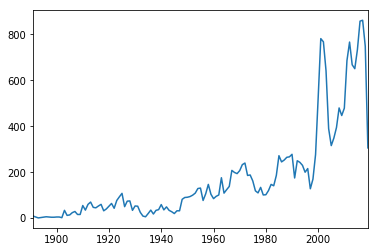

In [137]:
data['Operating Year'].astype(int).value_counts().sort_index(ascending=False).plot();

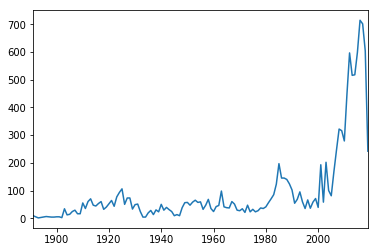

In [138]:
renewables['Operating Year'].astype(int).value_counts().sort_index(ascending=False).plot();

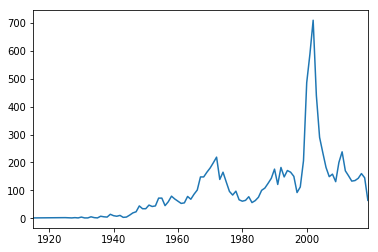

In [139]:
fossil_fuels['Operating Year'].astype(int).value_counts().sort_index(ascending=False).plot();

In [0]:
data.groupby('Operating Year')['Name